In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import string
import scipy.stats as scs
import itertools
from sklearn import preprocessing

In [2]:
raw_data = pd.read_csv('Dataset-perDay.csv')
raw_data.iloc[:,:]

,instant,Date,Season,Year,Month,Holiday,Weekday,WorkingDay,WeatherSit,Temp,aTemp,Humidity,WindSpeed,CasualUsersCount,RegisteredUsersCount,TotalCount
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27-12-2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,28-12-2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,29-12-2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,30-12-2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
# Converting the Date column to DateTime
raw_data['Date'] = pd.to_datetime(raw_data['Date'])

In [4]:
#Converting redpective variables to required data format 
raw_data['Date'] = pd.to_datetime(raw_data['Date'],yearfirst=True)
raw_data['Season'] = raw_data['Season'].astype('category')
raw_data['Year'] = raw_data['Year'].astype('category')
raw_data['Month'] = raw_data['Month'].astype('category')
raw_data['Holiday'] = raw_data['Holiday'].astype('category')
raw_data['Weekday'] = raw_data['Weekday'].astype('category')
raw_data['WorkingDay'] = raw_data['WorkingDay'].astype('category')
raw_data['WeatherSit'] = raw_data['WeatherSit'].astype('category')

raw_data['Temp'] = raw_data['Temp'].astype('float')
raw_data['aTemp'] = raw_data['aTemp'].astype('float')
raw_data['Humidity'] = raw_data['Humidity'].astype('float')
raw_data['WindSpeed'] = raw_data['WindSpeed'].astype('float')

raw_data['CasualUsersCount'] = raw_data['CasualUsersCount'].astype('float')
raw_data['RegisteredUsersCount'] = raw_data['RegisteredUsersCount'].astype('float')
raw_data['TotalCount'] = raw_data['TotalCount'].astype('float')

In [5]:
# Make Index values start with 1
# Do not execute this line of code again & again
raw_data = raw_data.drop('instant', axis=1)
raw_data.reset_index(drop=True, inplace=True)
raw_data.index += 1
raw_data.head(3)

,Date,Season,Year,Month,Holiday,Weekday,WorkingDay,WeatherSit,Temp,aTemp,Humidity,WindSpeed,CasualUsersCount,RegisteredUsersCount,TotalCount
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
2,2011-02-01,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
3,2011-03-01,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0


In [6]:
columns = list(raw_data.columns) # list of all columns
numerical_columns = list(raw_data._get_numeric_data().columns) # Numerical Columns
categorical_columns = list(set(columns) - set(numerical_columns)) # Categorical Columns

data = raw_data.copy()
data.shape

(731, 15)

## Missing Value Analysis 

In [7]:
data.isna().sum()

Date                    0
Season                  0
Year                    0
Month                   0
Holiday                 0
Weekday                 0
WorkingDay              0
WeatherSit              0
Temp                    0
aTemp                   0
Humidity                0
WindSpeed               0
CasualUsersCount        0
RegisteredUsersCount    0
TotalCount              0
dtype: int64

There are no missing values.

## Understanding Data and Deriving KPI's

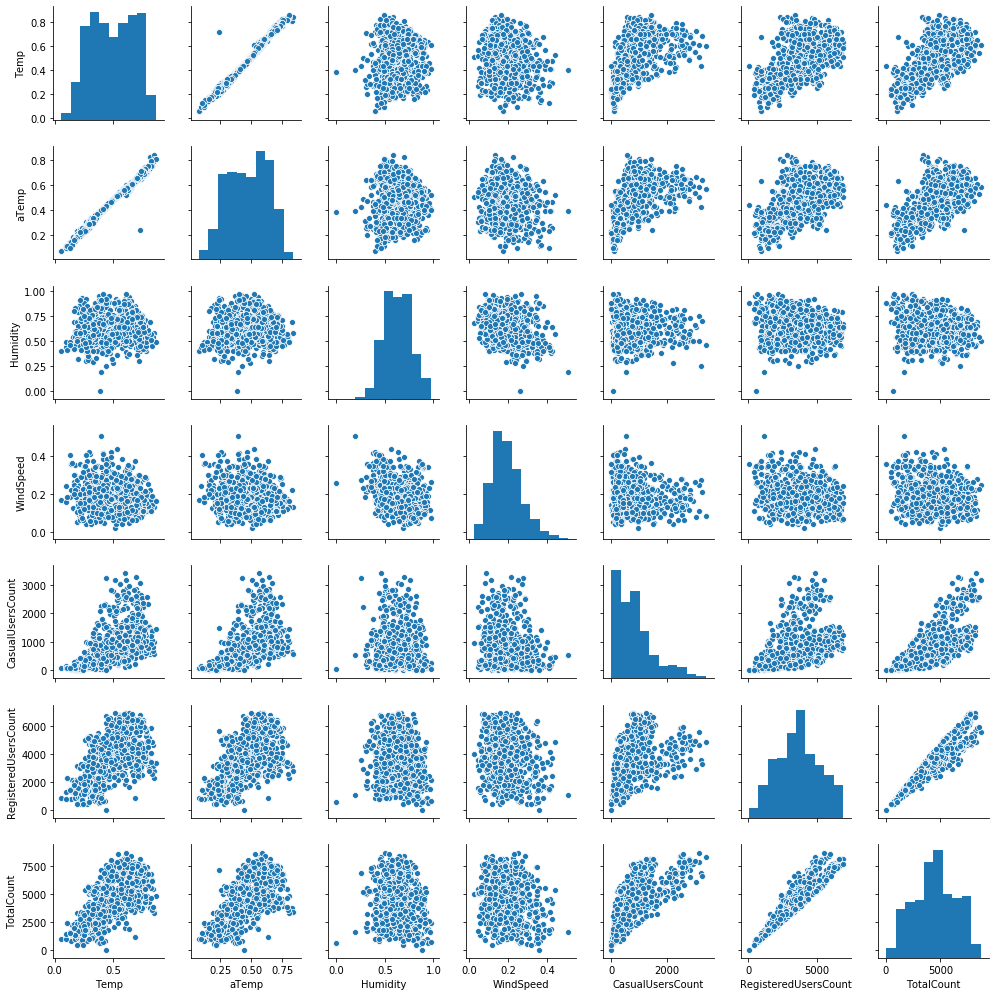

In [8]:
#pair plot for numeric variable analysis 
sns.pairplot(data=data[numerical_columns],height=2)
plt.show()

From the above plots, we can infer that..
1. Temp and aTemp are highly positively correlated.
2. RegisteredUsersCount and TotalCount are highly positively correlated.
3. CasualUsersCount and totalCount are moderatly positively correlated.
4. CasualUsersCount is right skewed.
5. Temp and aTemp are moderately positively correlated with TotalCount.

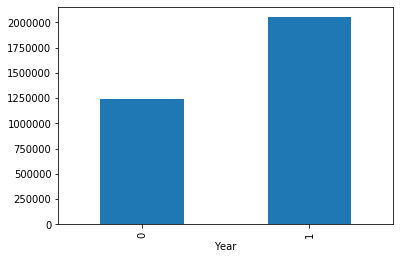

In [9]:
data.groupby('Year')['TotalCount'].sum().plot(kind='bar')

Where,<br>
0 stands for 2011<br>
1 stands for 2012

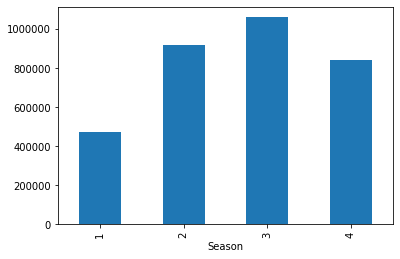

In [10]:
data.groupby('Season')['TotalCount'].sum().plot(kind='bar')

Where,<br>
1 = spring<br> 
2 = summer<br>
3 = Fall(autumn) <br>
4 = winter<br>

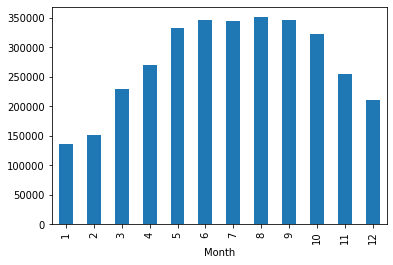

In [11]:
data.groupby('Month')['TotalCount'].sum().plot(kind='bar')

Where,<br>
1 = January<br>
2 = February<br>
3 = March<br>
4 = April<br>
5 = May<br>
6 = June<br>
7 = July<br>
8 = August<br>
9 = September<br>
10 = October<br>
11 = November<br>
12 = December<br>

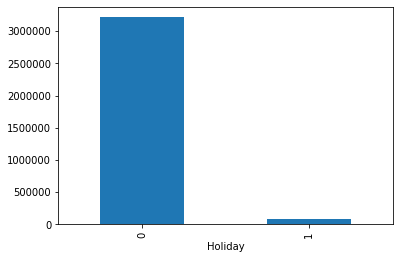

In [12]:
data.groupby('Holiday')['TotalCount'].sum().plot(kind='bar')

Where,<br>
0 = Holiday<br>
1 = Not a Holiday

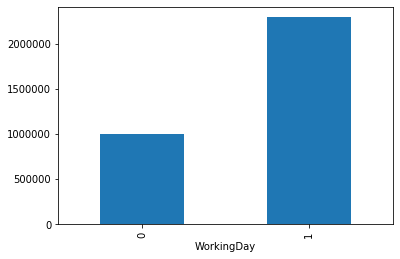

In [13]:
data.groupby('WorkingDay')['TotalCount'].sum().plot(kind='bar')

Where,<br>
0 = Working Day<br>
1 = Not a Working Day

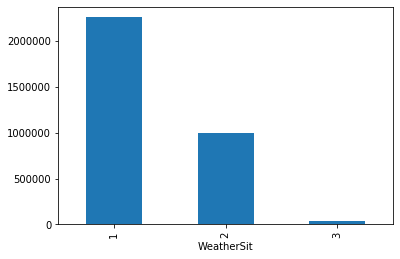

In [14]:
data.groupby('WeatherSit')['TotalCount'].sum().plot(kind='bar')

Where,<br>
1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>

### Insights from above plots

More number of bikes where rented in the year 2012, from the month of May to October which is summer season followed by autumn(fall), where it clear or partly cloudy.
Most customer visit and rent bikes on weekends, or if it a holiday. And moderate number of bikes where sold if it a working day.



_______________________________________________________________

## Outlier Analysis

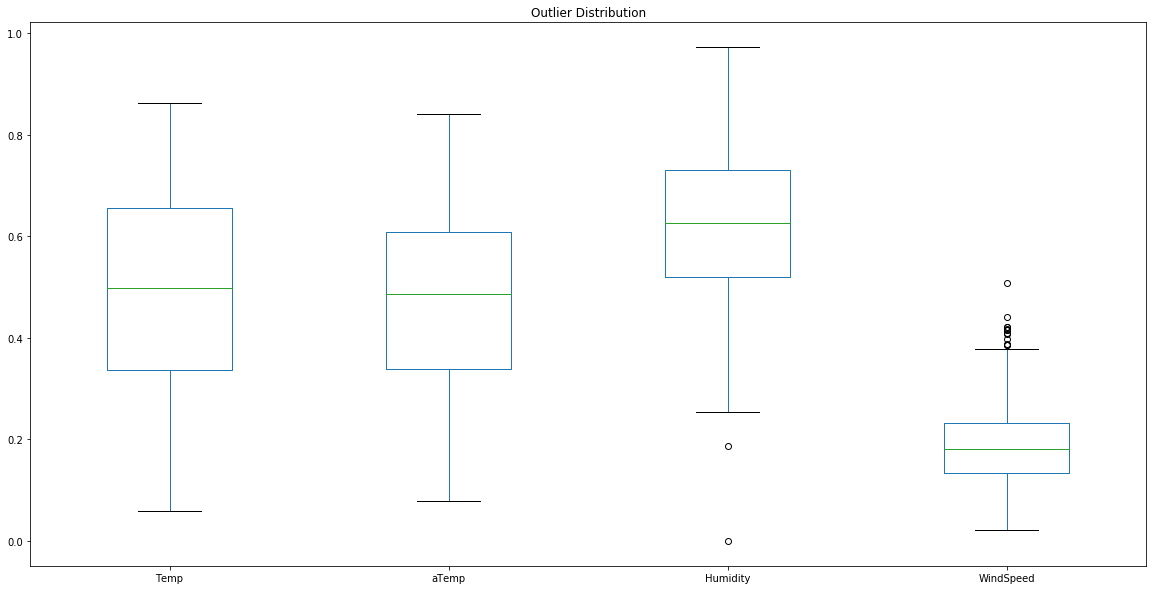

In [15]:
data[['Temp', 'aTemp', 'Humidity', 'WindSpeed']].plot.box(figsize=(20,10), legend=True, title='Outlier Distribution')

Therefore, From the above plots We can clearly see that there are outliers in 'Humidity' and 'WindSpeed'.

In [16]:
def removeOutliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1 # Inter Quartile Range
    
    filter = (df[column] >= (Q1 - 1.5 * IQR)) & ((df[column] <= (Q3 + 1.5 * IQR)))
    noOfOutliers = df.shape[0] - df.loc[filter].shape[0]
    return noOfOutliers, df.loc[filter]

In [17]:
noOfOutliers_Humidity, data1 = removeOutliers(data, 'Humidity')
print('Number of outliers present in "Humidity" column is:',noOfOutliers_Humidity)

Number of outliers present in "Humidity" column is: 2


In [18]:
noOfOutliers_WindSpeed, data1 = removeOutliers(data1, 'WindSpeed')
print('Number of outliers present in "WindSpeed" column is:',noOfOutliers_WindSpeed)

Number of outliers present in "WindSpeed" column is: 12


In [19]:
data1.reset_index(drop=True, inplace=True)
data1.index += 1
data1.shape

(717, 15)

Therefore, Number of rows reduced from 731 to 717.

## Feature Selection

In [20]:
# Finding correlation between Numerical Columns
correlation_matrix = data1[['Temp', 'aTemp', 'Humidity', 'WindSpeed', 'CasualUsersCount', 'RegisteredUsersCount', 'TotalCount']].corr()

# Converting it into an DataFrame
correlation_matrix = pd.DataFrame(correlation_matrix)

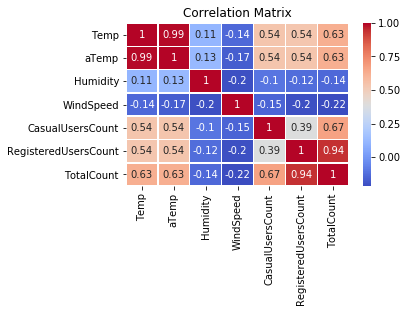

In [21]:
plt.figure(figsize = (5, 3))
ax = sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, linewidths=0.5, linecolor='w')
plt.title('Correlation Matrix')
plt.show()

Since there is very high correlation between 'aTemp' and 'Temp'. We will remove one. Here I am removing 'aTemp' column.<br>
We ignore the correlation between 'RegisteredUsersCount' and 'TotalCount'

In [22]:
# Drop 'aTemp' column since it is highly correlated with 'Temp' 
data1 = data1.drop('aTemp', axis=1)
numerical_columns.remove('aTemp')
data1.reset_index(drop=True, inplace=True)
data1.index += 1
data1.shape

(717, 14)

In [23]:
def crossTab(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2], margins=True)
    return contingency_table

def Chi_Square_Test(df, cols):
    col_pairs = list(itertools.combinations(cols, 2))
    for col1,col2 in col_pairs:
        probability = 0.95
        alpha = 1.0 - probability
        Chi_Sq_Statistic, P_val, Dof, Expected_freq = scs.chi2_contingency(crossTab(df, col1, col2))
        Critical_val = scs.chi2.ppf(probability, Dof)
        
#         print('For columns', col1.upper(), 'and', col2.upper(), ':')
#         print('Probability/Confidence_Level', probability)
#         print('Alpha/Significance_Level', alpha)
#         print('Chi-Square Statistic', Chi_Sq_Statistic)
#         print('P-value', P_val)
#         print('Degree of Freedom', Dof)
#         print('Expected Frequency', Expected_freq)
#         print('Critical Value', Critical_val)
#         print('THEREFORE............')
        
        if (abs(Chi_Sq_Statistic) >= Critical_val) & (P_val <= alpha):
            print('Reject H0. -> ',col1,'and',col2,'are Dependent. \n')
        else:
            print('Fail to reject H0. -> ',col1,'and',col2,'are Independent. \n')

In [24]:
categorical_columns.remove('Date')

In [25]:
# Call the function
Chi_Square_Test(data1, categorical_columns)

Fail to reject H0. ->  Season and WorkingDay are Independent. 

Fail to reject H0. ->  Season and Holiday are Independent. 

Fail to reject H0. ->  Season and WeatherSit are Independent. 

Fail to reject H0. ->  Season and Year are Independent. 

Fail to reject H0. ->  Season and Weekday are Independent. 

Reject H0. ->  Season and Month are Dependent. 

Reject H0. ->  WorkingDay and Holiday are Dependent. 

Fail to reject H0. ->  WorkingDay and WeatherSit are Independent. 

Fail to reject H0. ->  WorkingDay and Year are Independent. 

Reject H0. ->  WorkingDay and Weekday are Dependent. 

Fail to reject H0. ->  WorkingDay and Month are Independent. 

Fail to reject H0. ->  Holiday and WeatherSit are Independent. 

Fail to reject H0. ->  Holiday and Year are Independent. 

Reject H0. ->  Holiday and Weekday are Dependent. 

Fail to reject H0. ->  Holiday and Month are Independent. 

Fail to reject H0. ->  WeatherSit and Year are Independent. 

Fail to reject H0. ->  WeatherSit and Week

Therefore, Weekday->WorkingDay->Holiday are dependent of each other, we will remove any two variables. Here I am removing Weekday and WorkingDay. <br>
Regarding Month and Season, Season is categorised based on different factors and is no where related to the categarization of month, we ignore that.

In [26]:
categorical_columns.remove('Weekday')
categorical_columns.remove('WorkingDay')

data1 = data1.drop(['Weekday', 'WorkingDay'], axis=1)
data1.reset_index(drop=True, inplace=True)
data1.index += 1

data1.shape

(717, 12)

## Feature Scaling

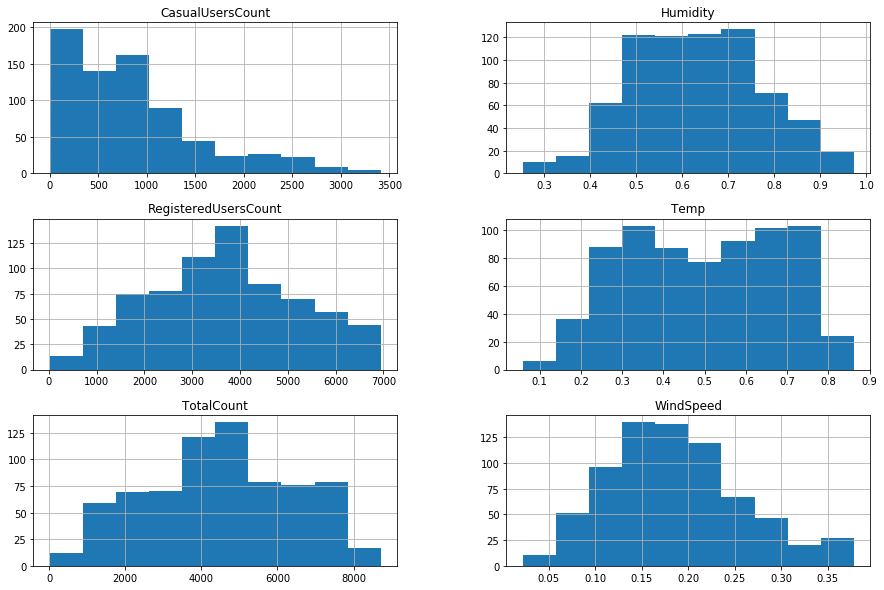

In [27]:
data1[numerical_columns].hist(figsize=(15,10))
plt.show()

In [28]:
# Normalized = pd.DataFrame(preprocessing.scale(data1[numerical_columns]), columns=numerical_columns)
# print(Normalized.shape)
# Normalized.reset_index(drop=True)
# Normalized.index += 1
# Normalized = Normalized.join(data1[categorical_columns])
# Normalized

In [29]:
# l = list(range(1, 718))
# for i in data1.index:
#     if i not in l:
#         print(i)

Since Scaling is not improving the preformance of the model. We undo it.

## Model Development

In [30]:
data2 = data1.copy()

# Selecting variables for training the model
X = data2[['Season', 'Year', 'Month', 'Holiday', 'WeatherSit', 'Temp', 'Humidity', 'WindSpeed']]

# Creating dummies for Categorical Variables
# X = pd.get_dummies(X)

Y = data2[['CasualUsersCount', 'RegisteredUsersCount', 'TotalCount']]
Y1 = Y['CasualUsersCount']
Y2 = Y['RegisteredUsersCount']
Y3 = Y['TotalCount']

In [31]:
# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y3, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(573, 8) (144, 8) (573,) (144,)


In [32]:
#Mean absolute percentage error
def MAPE(actual ,predicted):
    return np.mean(np.abs((actual-predicted)/actual))*100

In [33]:
import sklearn.metrics as metrics
def errorMetrics(actual, predicted):
    r_squared_value = metrics.r2_score(actual, predicted)
    mean_absolute_error = metrics.mean_absolute_error(actual, predicted) 
    meam_squared_error = metrics.mean_squared_error(actual, predicted) 
    mean_squared_log_error = metrics.mean_squared_log_error(actual, predicted)
    median_absolute_error = metrics.median_absolute_error(actual, predicted)
    explained_variance=metrics.explained_variance_score(actual, predicted)
    
    
    print('r-squared value        : ', round(r_squared_value,4))
    print('Mean Absolute Error    : ', round(mean_absolute_error,4))
    print('Mean Squared Error     : ', round(meam_squared_error,4))
    print('mean_squared_log_error : ', round(mean_squared_log_error,4))
    print('Root Mean Squared Error: ', round(np.sqrt(meam_squared_error),4))
    print('Median Absolute Error  : ', round(median_absolute_error, 4))
    print('Explained Variance     : ', round(explained_variance,4))
    


## Linear Regression Model

In [34]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression().fit(X_train, Y_train)
LR_pred = LR_model.predict(X_test)
print('Train accuracy:', LR_model.score(X_train, Y_train)*100)
print('Test accuracy:', LR_model.score(X_test, Y_test)*100)
print('\n----ERROR METRICS----')
errorMetrics(Y_test, LR_pred)

Train accuracy: 78.75553739054372
Test accuracy: 80.61356885721506

----ERROR METRICS----
r-squared value        :  0.8061
Mean Absolute Error    :  623.0264
Mean Squared Error     :  730165.7614
mean_squared_log_error :  0.2424
Root Mean Squared Error:  854.4974
Median Absolute Error  :  477.6232
Explained Variance     :  0.8088


## Random Forest Model

In [35]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor().fit(X_train, Y_train)
RF_pred = RF_model.predict(X_test)
print('Train accuracy:', RF_model.score(X_train, Y_train)*100)
print('Test accuracy:', RF_model.score(X_test, Y_test)*100)
print('\n----ERROR METRICS----')
errorMetrics(Y_test, RF_pred)

Train accuracy: 97.69150947305477
Test accuracy: 84.486064100798

----ERROR METRICS----
r-squared value        :  0.8449
Mean Absolute Error    :  474.9132
Mean Squared Error     :  584313.0556
mean_squared_log_error :  0.2355
Root Mean Squared Error:  764.4037
Median Absolute Error  :  308.05
Explained Variance     :  0.8464


C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()
DT_model.fit(X_train, Y_train)
DT_pred = DT_model.predict(X_test)
print('Train accuracy Score: ', DT_model.score(X_train, Y_train)*100)
print('Test accuracy Score: ', DT_model.score(X_test, Y_test)*100)
print('\n----ERROR METRICS----')
errorMetrics(Y_test, DT_pred)

Train accuracy Score:  100.0
Test accuracy Score:  75.31996965179688

----ERROR METRICS----
r-squared value        :  0.7532
Mean Absolute Error    :  639.8125
Mean Squared Error     :  929542.5764
mean_squared_log_error :  0.2814
Root Mean Squared Error:  964.1279
Median Absolute Error  :  401.5
Explained Variance     :  0.7535


## SVR

In [37]:
from sklearn.svm import SVR

SVR_model = SVR() #C=1.0, epsilon=0.2)
SVR_model.fit(X_train, Y_train)
SVR_pred = SVR_model.predict(X_test)
print('Train accuracy Score: ', SVR_model.score(X_train, Y_train)*100)
print('Test accuracy Score: ', SVR_model.score(X_test, Y_test)*100)
print('\n----ERROR METRICS----')
errorMetrics(Y_test, SVR_pred)

C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train accuracy Score:  3.349574126396082
Test accuracy Score:  1.9331205535797036

----ERROR METRICS----
r-squared value        :  0.0193
Mean Absolute Error    :  1592.1001
Mean Squared Error     :  3693566.762
mean_squared_log_error :  0.4626
Root Mean Squared Error:  1921.8654
Median Absolute Error  :  1465.9918
Explained Variance     :  0.0367


## K-Neighbours Regressor Model

In [38]:
from sklearn.neighbors import KNeighborsRegressor

KNR_model = KNeighborsRegressor(n_neighbors=3)
KNR_model.fit(X_train, Y_train)
KNR_pred = KNR_model.predict(X_test)
print('Train accuracy Score: ', KNR_model.score(X_train, Y_train)*100)
print('Test accuracy Score: ', KNR_model.score(X_test, Y_test)*100)
print('\n----ERROR METRICS----')
errorMetrics(Y_test, KNR_pred)

Train accuracy Score:  92.07478039558949
Test accuracy Score:  86.86931574674477

----ERROR METRICS----
r-squared value        :  0.8687
Mean Absolute Error    :  516.4028
Mean Squared Error     :  494550.8534
mean_squared_log_error :  0.194
Root Mean Squared Error:  703.2431
Median Absolute Error  :  374.0
Explained Variance     :  0.8692


## Gradient Boosting Regressor Model

In [39]:
from sklearn import ensemble

GBR_model = ensemble.GradientBoostingRegressor()
GBR_model.fit(X_train, Y_train)
GBR_pred = GBR_model.predict(X_test)
print('Train accuracy Score: ', GBR_model.score(X_train, Y_train)*100)
print('Test accuracy Score: ', GBR_model.score(X_test, Y_test)*100)
print('\n----ERROR METRICS----')
errorMetrics(Y_test, GBR_pred)

Train accuracy Score:  95.12811608901337
Test accuracy Score:  90.55321560154206

----ERROR METRICS----
r-squared value        :  0.9055
Mean Absolute Error    :  406.3015
Mean Squared Error     :  355801.3578
mean_squared_log_error :  0.1812
Root Mean Squared Error:  596.4909
Median Absolute Error  :  278.4006
Explained Variance     :  0.9066


# End

### Linear Regression            :     80.61% accurate

### Random Forest                 :     86.26% accurate

### Decision Tree Regressor :     75.09% accurate

### SVR                                    :     -

### K Neighbour Regressor   :     86.86% accurate

### Gradient Boosting            :     90.43% accurate

